Mean of 1000 simulations 16.02605042842282
Mean of 10000 simulations 16.002400604956247
Mean of 100000 simulations 15.99996295441389


Standard deviation of 1000 simulations 0.34350960927849555
Standard deviation of 10000 simulations 0.34735648429722926
Standard deviation of 100000 simulations 0.34875479418424904


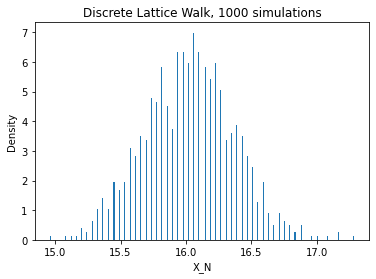

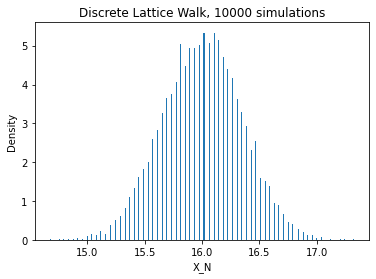

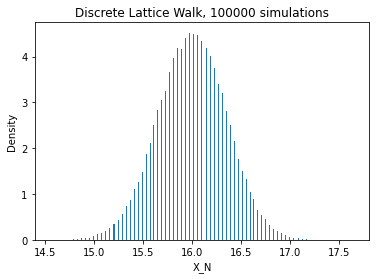

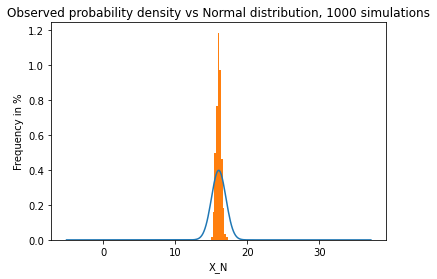

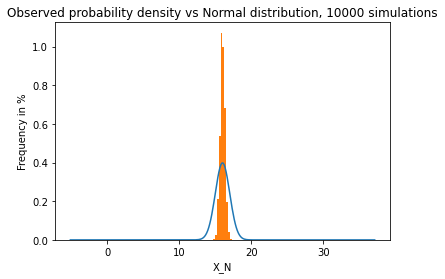

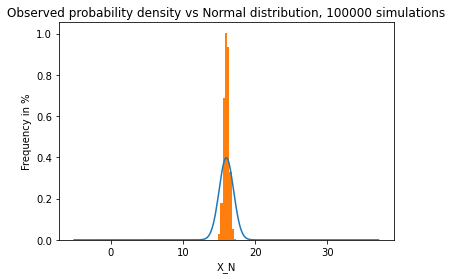

In [10]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

### Question 2 ###

# N_sim - number of simulations
# N - number of timesteps
# mu - drift
# T - expiry time
# sigma - volatility
# X_init
def latticewalk(n_sim, N, mu, T, sigma, X_init):
    delt = T/N
    up = sigma*math.sqrt(delt)
    down = -sigma*math.sqrt(delt)
    
    # probability of moving up
    p = 1./2.*(1. + mu/sigma*math.sqrt(delt))
    
    # X_new is a vector containing the lattice point for n simulations at a step
    # starting at X_init
    X_new = np.ones(n_sim)*X_init;
    
    # ptest is a vector contaning the probabilities of movements
    # for each simulation at a step
    ptest = np.zeros(n_sim);
    
    for i in np.arange(N):
        ptest = np.random.uniform(0,1,n_sim);
        ptest = (ptest <= p);
        
        X_new = X_new + ptest*up + (1-ptest)*down;
        
    return X_new


X_1K = latticewalk(1000, 300, 0.5, 2.0, 0.25, 15)
X_10K = latticewalk(10000, 300, 0.5, 2.0, 0.25, 15)
X_100K = latticewalk(100000, 300, 0.5, 2.0, 0.25, 15)

# Expected mean and standard deviation of the simulations
mean_1K = np.mean(X_1K) # mean of 1000 simulations
mean_10K = np.mean(X_10K) # mean of 10000 simulations
mean_100K = np.mean(X_100K) # mean of 100000 simulations

std_1K = np.std(X_1K) # standard dev. of 1000 simulations
std_10K = np.std(X_10K) # standard dev. of 10000 simulations
std_100K = np.std(X_100K) # standard dev. of 100000 simulations

print("Mean of 1000 simulations", mean_1K)
print("Mean of 10000 simulations", mean_10K)
print("Mean of 100000 simulations", mean_100K)
print("\n");
print("Standard deviation of 1000 simulations", std_1K)
print("Standard deviation of 10000 simulations", std_10K)
print("Standard deviation of 100000 simulations", std_100K)


# Histogram of the observed probability density versus X(T)

# Probability density plot of the 3 sets of simulations
plt.hist(X_1K, bins=301, density=1)
plt.title("Discrete Lattice Walk, 1000 simulations")
plt.xlabel("X_N")
plt.ylabel("Density")
plt.show()

plt.hist(X_10K, bins=301, density=1)
plt.title("Discrete Lattice Walk, 10000 simulations")
plt.xlabel("X_N")
plt.ylabel("Density")
plt.show()

plt.hist(X_100K, bins=301, density=1)
plt.title("Discrete Lattice Walk, 100000 simulations")
plt.xlabel("X_N")
plt.ylabel("Density")
plt.show()

# Create normal plot over histogram
x_max = 15 + (300 * 0.25 * math.sqrt(2/300)) # max value of X 

# Range of the normal plots with the mean from the set of simulations
norm_axis1K = np.linspace(-norm_max + mean_1K, norm_max + mean_1K, 300)
norm_axis10K = np.linspace(-norm_max + mean_10K, norm_max + mean_10K, 300)
norm_axis100K = np.linspace(-norm_max + mean_100K, norm_max + mean_100K, 300)

norm_plot1K = norm.pdf(norm_axis1K, mean_1K) 
weights1K = np.ones_like(X_1K)/float(len(X_1K))

norm_plot10K = norm.pdf(norm_axis10K, mean_10K) 
weights10K = np.ones_like(X_10K)/float(len(X_10K))

norm_plot100K = norm.pdf(norm_axis100K, mean_100K) 
weights100K = np.ones_like(X_100K)/float(len(X_100K))

# Plots of histogram of observed probability density versus X(T)
plt.plot(norm_axis1K, norm_plot1K)
plt.hist(X_1K, weights=weights1K, density=1)
plt.title("Observed probability density vs Normal distribution, 1000 simulations")
plt.xlabel("X_N")
plt.ylabel("Frequency in %")
plt.show()

plt.plot(norm_axis10K, norm_plot10K)
plt.hist(X_10K, weights=weights10K, density=1)
plt.title("Observed probability density vs Normal distribution, 10000 simulations")
plt.xlabel("X_N")
plt.ylabel("Frequency in %")
plt.show()

plt.plot(norm_axis100K, norm_plot100K)
plt.hist(X_100K, weights=weights100K, density=1)
plt.title("Observed probability density vs Normal distribution, 100000 simulations")
plt.xlabel("X_N")
plt.ylabel("Frequency in %")
plt.show()


Observations 

Based on the statistics results, as the number of simulations increase the mean  
becomes smaller while the standard deviation grows bigger which suggests there are 
more outliers as the number of simulations increase

Based on the probability density plots, the look to follow a normal distribution
as the number of simulations increase

Based on the histogram of the observed probability density versus X(T), it looks that
values of X_N have more frequencies that fall under or closer to the normal curve as 
the number of simulations increase

Mean for I(T,T/N) N= 100 :  1.4866381060520157
Variance for I(T,T/N) N= 100 :  0.045025546398818526


Mean for I(T,T/N) N= 200 :  1.4923638348664447
Variance for I(T,T/N) N= 200 :  0.022436385948416345


Mean for I(T,T/N) N= 400 :  1.496231647046356
Variance for I(T,T/N) N= 400 :  0.011202079491991666


Mean for I(T,T/N) N= 800 :  1.4979560630637376
Variance for I(T,T/N) N= 800 :  0.0056162694930967


Mean for I(T,T/N) N= 1600 :  1.4986301804276128
Variance for I(T,T/N) N= 1600 :  0.0028105859492062023


Mean for I(T,T/N) N= 6400 :  1.4999423918606296
Variance for I(T,T/N) N= 6400 :  0.0007000161089979421




<function matplotlib.pyplot.show(close=None, block=None)>

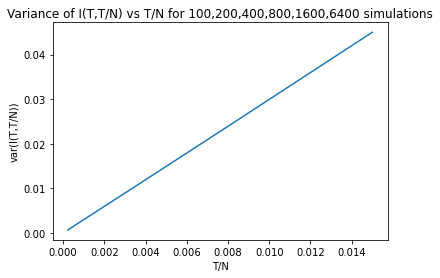

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

### Question 3 ###

# brownianito returns a vector of length 75000 which 
# contains final values I(T, T/N) based on their
# independent path
# T - value of T
# N - number of timesteps
def brownianito(T, N): 
    z_i = np.zeros(75000);
    for i in np.arange(N-1):
        norm_vals = np.random.normal(0,1,75000);
        z_i = z_i + (norm_vals * math.sqrt(T/N))**2;
    return z_i

N = [100,200,400,800,1600,6400]     # vector of timesteps
var_n = []                          # variances of I(T,T/N) for different values of T/N
dt_n = (np.ones(6)*1.5)/N           # vector contaning values of T/N for different values of N

# Calculate mean and variance for each values of I(T,T/N) for different values 
# of N
for i in N:
    i_val = brownianito(1.5,i);
    i_mean = np.mean(i_val);
    i_var = np.var(i_val);
    var_n.append(i_var)
    print("Mean for I(T,T/N) N=",i,": ", i_mean);
    print("Variance for I(T,T/N) N=",i,": ", i_var);
    print("\n");

# Plot of var(I(T,T/N)) vs T/N
plt.plot(dt_n,var_n)
plt.title("Variance of I(T,T/N) vs T/N for 100,200,400,800,1600,6400 simulations")
plt.xlabel("T/N")
plt.ylabel("var(I(T,T/N))")
plt.show
    

Observation of plot 

Based on the plot, as T/N approaches 0 then var(I(T,T/N)) approaches 0.
Hence this suggests that the higher the number of timesteps there are, var(I(T,T/N)) will have a lower value 